In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics 
plt.rcParams['figure.figsize'] = (12.0, 9.0)

In [10]:
def readfile_func(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:,0].values.reshape(-1,1)
    Y = data.iloc[:,1].values.reshape(-1,1)
    plt.title('Salary VS Experience Data( Original Data )')
    plt.scatter(X, Y)
    plt.show()
    return X, Y


In [3]:
def calculate_cost_func(X_train,Y_train,c,m):
    cost = 0.0
    for i in range(X_train.shape[0]):
        cost += (c + m*X_train[i] - Y_train[i])**2 
    return cost

In [4]:
def log_gradient_func(X_train,Y_train,c,m):
    d_m = 0
    d_c = 0
    size = X_train.shape[0]
    for i in range(size):
        d_c = d_c + (c + m*X_train[i] - Y_train[i])  #w.rt to c
        d_m = d_m + ((c + m*X_train[i] - Y_train[i])*X_train[i])  #wrt to m
    
    d_c = d_c*(1.0/size)
    d_m = d_m*(1.0/size)
    return d_c, d_m
        

In [5]:
def gradient_descent_func(X_train,Y_train,alpha =.00001, ep =.0001):
    
    
    iteration = 0
    converged = True

    m =  np.random.randn(); 
    c = np.random.randn();
    cost = calculate_cost_func(X_train,Y_train,c,m)
    
    while converged:
        
        d_c, d_m = log_gradient_func(X_train,Y_train,c,m)
        temp0 = c - alpha * d_c    # finding new c and m from using gradient descent
        temp1 = m - alpha * d_m
        c = temp0  # updating c and m
        m = temp1
        e = calculate_cost_func(X_train,Y_train,c,m) # mean squared error to check if c and m are good fit 
        if abs(cost-e) <= ep:   # taking abs value to ignore the negative value
            print('Converged, iterations: ', iteration, '!!!')
            converged = False     
        cost = e  
        iteration = iteration + 1
    return c,m

In [7]:
def predict_func(X,c,m):
    Y_pred = m*X + c
    return Y_pred

In [13]:
def bestFitLine(X,slope,coeff):
    Y_pred = slope*X + coeff
    return Y_pred

In [8]:
def buildModel_func(X,Y):
    
    # dividing my train and test size
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)
    c,m = gradient_descent_func(X_train,Y_train)
    
    # plotting the results
    plt.scatter(X_train,Y_train,color='red')
    plt.plot(X_train,predict_func(X_train,c,m))
    plt.title('Salary VS Experience (Training set)')
    plt.xlabel('Year of Experience')
    plt.ylabel('Salary')
    plt.show()
    
    plt.scatter(X_test,Y_test,color='red')
    plt.plot(X_test,predict_func(X_test,c,m))
    plt.title('Salary VS Experience (Testing set)')
    
    plt.xlabel('Year of Experience')
    plt.ylabel('Salary')
    plt.show()
    return c,m
    
    

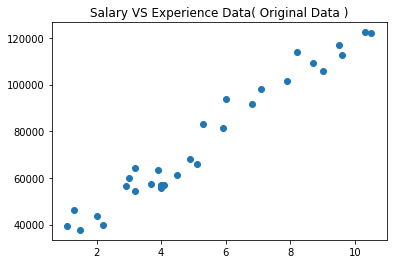

In [11]:
X, Y = readfile_func('salary_data.csv') #loading the dataset

Converged, iterations:  4283814 !!!


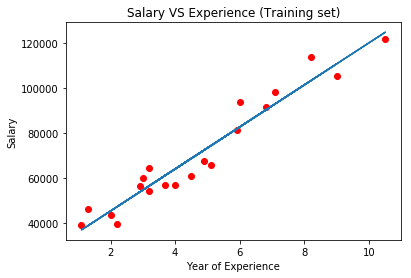

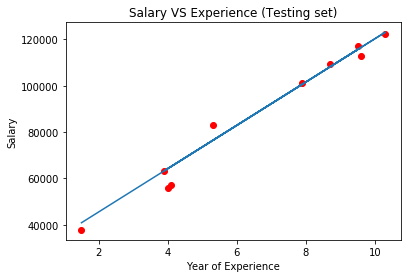

In [12]:
c,m = buildModel_func(X,Y)

In [19]:
y_pred=bestFitLine(X,m,c)
df_result = pd.DataFrame({'Years of Experience': X.flatten(),'Actual': Y.flatten(), 
                          'Predicted': y_pred.flatten()}).head(10)
df_result

,Actual,Predicted,Years of Experience
0,39343,37094.854096,1.1
1,46205,38964.118517,1.3
2,37731,40833.382939,1.5
3,43525,45506.543993,2.0
4,39891,47375.808415,2.2
5,56642,53918.233891,2.9
6,60150,54852.866101,3.0
7,54445,56722.130523,3.2
8,64445,56722.130523,3.2
9,57189,61395.291577,3.7


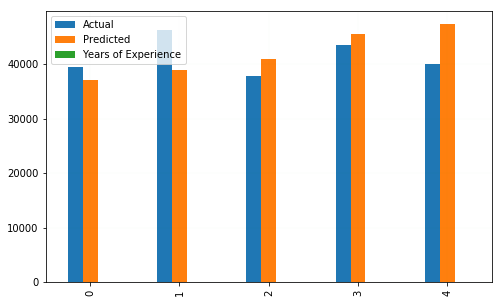

In [20]:
df1 = df_result.head()
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.015', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.015', color='black')
plt.show()

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, y_pred)))

Mean Absolute Error: 4682.2534596690275
Mean Squared Error: 31576438.518852543
Root Mean Squared Error: 5619.291638529944


You can see that the value of root mean squared error is 5619, which is less than 10% of the mean value of the percentages of all the salary i.e. 76003. This means that our algorithm did a decent job.